In [1]:
import gym
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tnrange

In [25]:
from Agents.DQNAgent import DQNAgent

from Agents.DQNAgent import DQNAgentTF

In [3]:
%load_ext autoreload
%autoreload 2

Make the environment

In [4]:
env = gym.make('CartPole-v1')

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


And the agent

In [7]:
num_episodes = 5000

In [6]:
agent = DQNAgent(env.observation_space.shape[0], 2)

Run the training Loop

In [7]:
scores = []
for e in tnrange(num_episodes):
    state = env.reset()
    for survived_time in range(500):
                # TODO Fix display on docker before rendering
                #env.render()
                action = agent.act(state)
                # make a move and go to the next frame 
                next_state, reward, done, _ = env.step(action)
                # Remember the previous state, action, reward, and done
                agent.remember(state, action, reward, next_state, done)
                # make next_state the new current state for the next frame.
                state = next_state
                # done is true only when the game ends
                if done: # Move to the next episode when done
                    #print("episode: %d/%d, score: %d" % (e, num_episodes, survived_time))
                    scores.append(survived_time)
                    break
    agent.learn(64)

In [35]:
def moving_average(a, n=1000) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

Let us define succes as getting an average score of 200

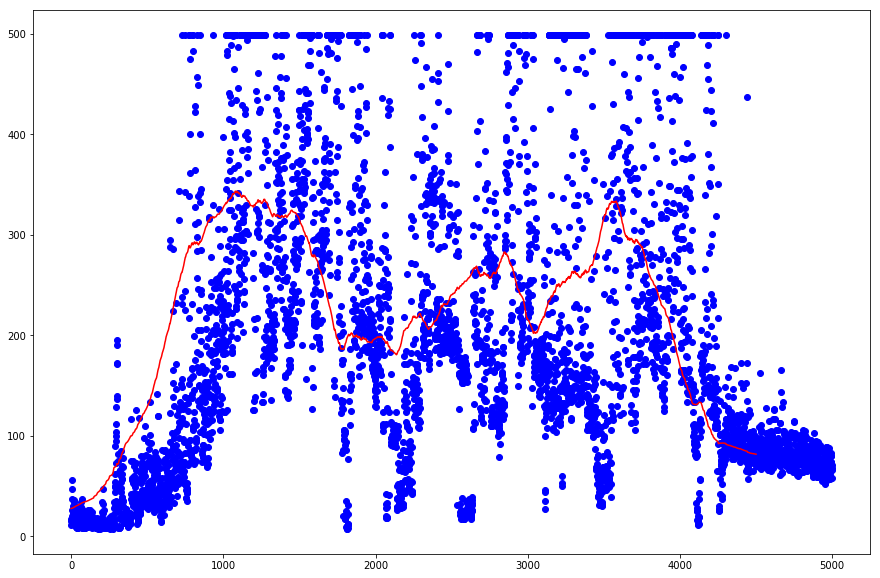

In [9]:
fig = plt.figure(figsize=(15,10))
plt.plot(scores, 'bo')
plt.plot(moving_average(scores,n=500), 'r')

In [10]:
import tensorflow as tf

In [33]:
env.observation_space.shape[0]

4

In [23]:
inputs = tf.placeholder('float', shape=[None, env.observation_space.shape[0]])
targets = tf.placeholder('float', shape=[None, 2])

layer1_weights = tf.Variable(initial_value=tf.random_normal([env.observation_space.shape[0],24]))
layer1_bias = tf.Variable(initial_value=tf.random_normal([24]))
layer1_outputs = tf.nn.relu(tf.add(tf.matmul(inputs, layer1_weights), layer1_bias))
layer2_weights = tf.Variable(initial_value=tf.random_normal([24, 24]))
layer2_bias = tf.Variable(initial_value=tf.random_normal([24]))
layer2_outputs = tf.nn.relu(tf.add(tf.matmul(layer1_outputs, layer2_weights), layer2_bias))
layer3_weights = tf.Variable(initial_value=tf.random_normal([24, 2]))
layer3_bias = tf.Variable(initial_value=tf.random_normal([2]))
model_outputs = tf.nn.relu(tf.add(tf.matmul(layer2_outputs, layer3_weights), layer3_bias))
model_action = tf.argmax(model_outputs, axis=1)
model_loss = tf.losses.mean_squared_error(targets, model_outputs)


In [24]:
model_action.shape

TensorShape([Dimension(None)])

In [38]:
agent = DQNAgentTF(env.observation_space.shape[0], 2)

In [42]:
scores = []
for e in tnrange(num_episodes):
    state = env.reset()
    for survived_time in range(500):
                # TODO Fix display on docker before rendering
                #env.render()
                action = agent.act(state)
                # make a move and go to the next frame 
                next_state, reward, done, _ = env.step(action)
                # Remember the previous state, action, reward, and done
                agent.remember(state, action, reward, next_state, done)
                # make next_state the new current state for the next frame.
                state = next_state
                # done is true only when the game ends
                if done: # Move to the next episode when done
                    #print("episode: %d/%d, score: %d" % (e, num_episodes, survived_time))
                    scores.append(survived_time)
                    
                    agent.learn(64)
                    break


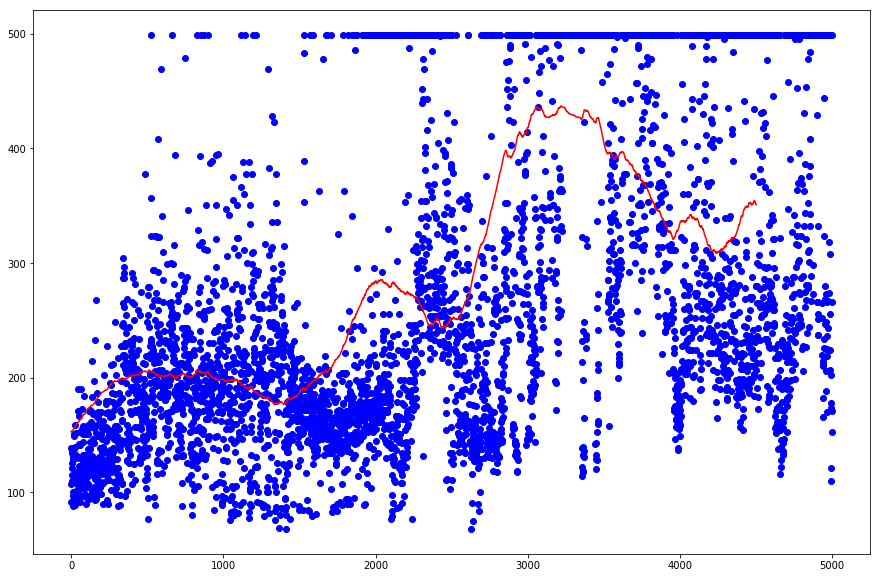

In [43]:
fig = plt.figure(figsize=(15,10))
plt.plot(scores, 'bo')
plt.plot(moving_average(scores,n=500), 'r')

In [44]:
agent.epsilon

0.00998645168764533

In [45]:
agent.epsilon_min

0.01